In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import pathlib


warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
cwd = pathlib.Path.cwd()
root = cwd.parent

data_path = f"{root}/preprocessing/processed_data/preprocessed.parquet.snappy"
df = pd.read_parquet(data_path)
df.head()

,r_id,r_stars,r_stars_square,r_length,u_friends_count,u_review_count,u_month_age,b_stars,b_review_count,r_sen,r_sub,r_rea,r_useful
index,,,,,,,,,,,,,
0,4,5,25,43,1,9,11.538455,4.0,181,0.305871,0.775379,81.59,0.011830
1,9,3,9,103,1,24,5.092347,4.5,13,0.027222,0.558611,76.15,0.014351
2,11,5,25,179,7,39,76.740056,2.5,8,0.280583,0.489970,70.43,0.025320
3,18,4,16,109,112,74,60.558653,4.0,398,0.130754,0.289683,78.59,0.011194
4,19,5,25,78,8,27,48.322330,4.0,55,0.236861,0.368667,77.06,0.028382


In [3]:
print(f"Number of records in our dataset : {df.shape[0]}")
print(f"Number of features in our dataset : {df.shape[1]}")

Number of records in our dataset : 2575783
Number of features in our dataset : 13


# Exploratory Data Analysis

## Dataset Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_id,2575783.0,3.523525e+06,2.016891e+06,4.000000e+00,1.805223e+06,3.484057e+06,5.289786e+06,6.990280e+06
r_stars,2575783.0,3.607544e+00,1.538538e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
r_stars_square,2575783.0,1.538147e+01,9.619030e+00,1.000000e+00,4.000000e+00,1.600000e+01,2.500000e+01,2.500000e+01
r_length,2575783.0,1.332821e+02,1.149836e+02,0.000000e+00,5.700000e+01,1.010000e+02,1.710000e+02,1.068000e+03
u_friends_count,2575783.0,1.890087e+02,5.672281e+02,1.000000e+00,2.000000e+00,4.000000e+01,1.680000e+02,1.499500e+04
u_review_count,2575783.0,1.912800e+02,4.974955e+02,0.000000e+00,1.100000e+01,4.400000e+01,1.760000e+02,1.747300e+04
u_month_age,2575783.0,4.275028e+01,3.455216e+01,3.802649e-07,1.364109e+01,3.645798e+01,6.515363e+01,2.018375e+02
b_stars,2575783.0,3.742913e+00,7.946069e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
b_review_count,2575783.0,3.368345e+02,6.656724e+02,5.000000e+00,4.000000e+01,1.250000e+02,3.410000e+02,7.568000e+03
r_sen,2575783.0,1.823502e-01,1.926674e-01,-1.000000e+00,6.004100e-02,1.808010e-01,3.004170e-01,1.000000e+00


## Missing Values in our dataset

In [5]:
pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'percent_missing'})

,percent_missing
r_id,0.0
r_stars,0.0
r_stars_square,0.0
r_length,0.0
u_friends_count,0.0
u_review_count,0.0
u_month_age,0.0
b_stars,0.0
b_review_count,0.0
r_sen,0.0


## Histogram of the Review Stars

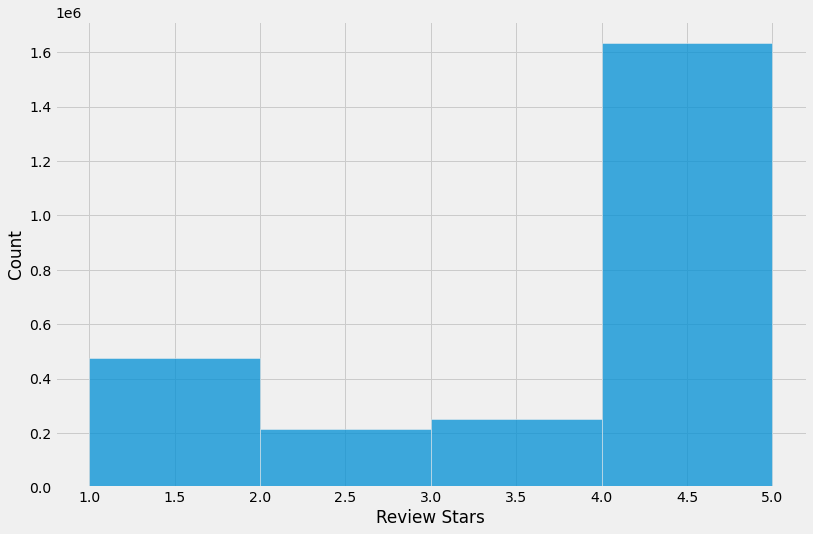

In [6]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="r_stars", bins=4)
plt.xlabel("Review Stars")
plt.show()

## Histogram of Review Stars Squared

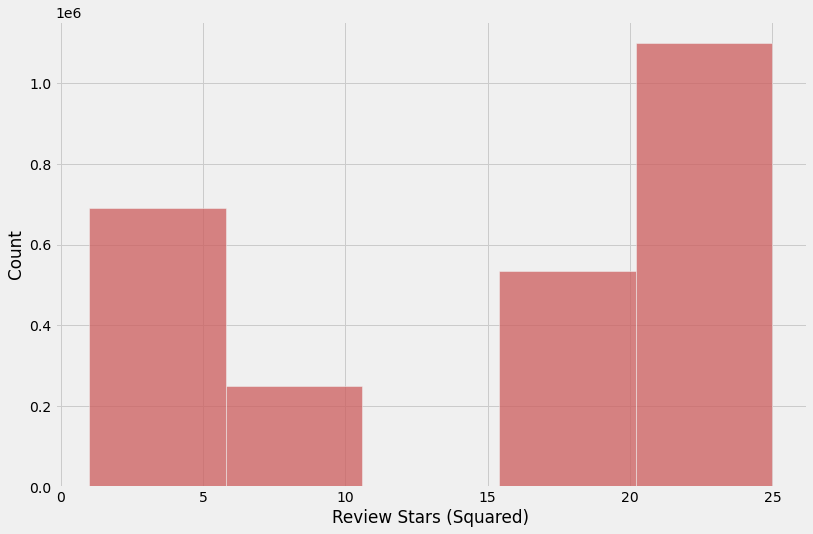

In [7]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="r_stars_square", bins=5, color="indianred")
plt.xlabel("Review Stars (Squared)")
plt.show()

## Histogram of Review Length

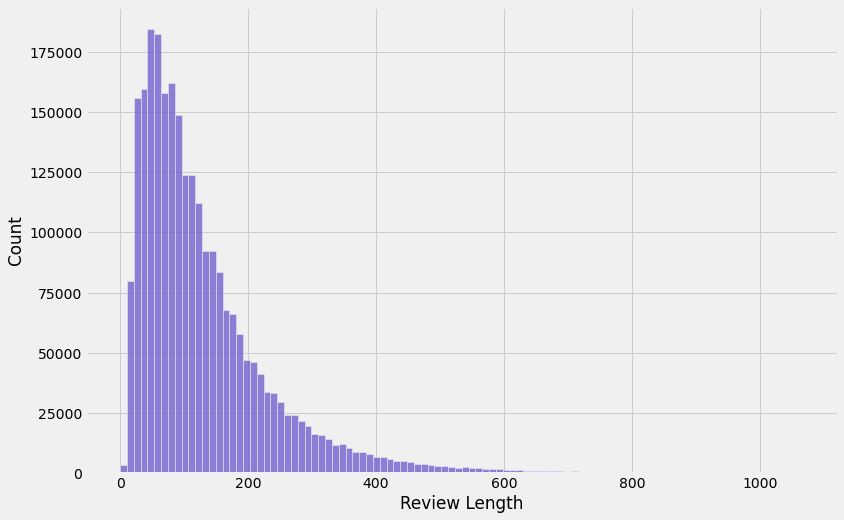

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="r_length", bins=100, color="slateblue")
plt.xlabel("Review Length")
plt.show()

## Histogram of Friends Count

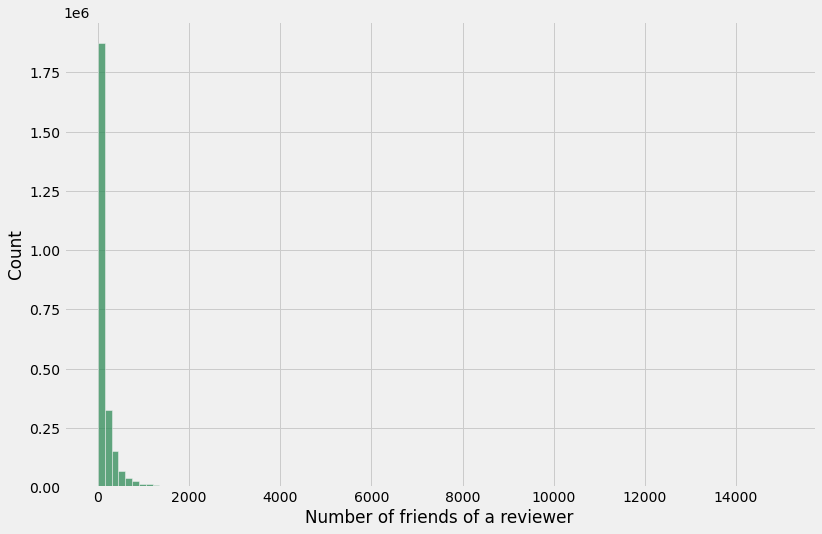

In [9]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="u_friends_count", bins=100, color="seagreen")
plt.xlabel("Number of friends of a reviewer")
plt.show()

## Histogram of Review Count

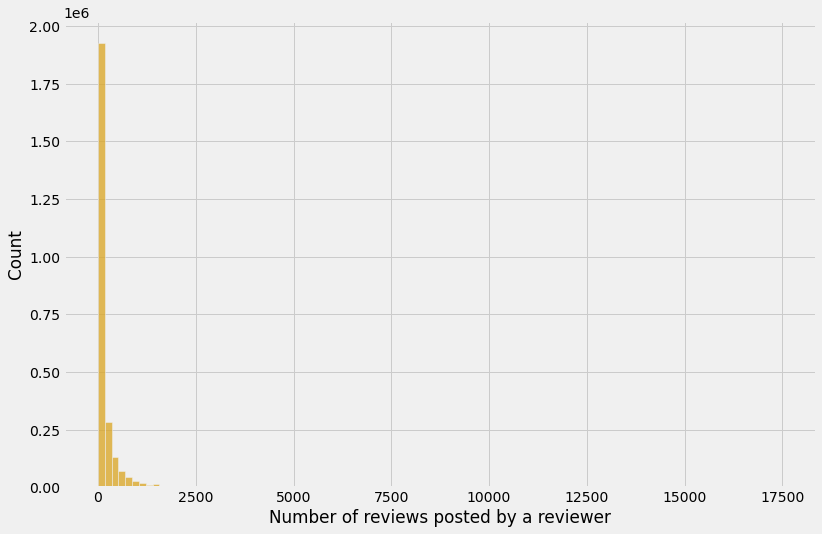

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="u_review_count", bins=100, color="goldenrod")
plt.xlabel("Number of reviews posted by a reviewer")
plt.show()

## Distribution of User Account's age at time of review posting

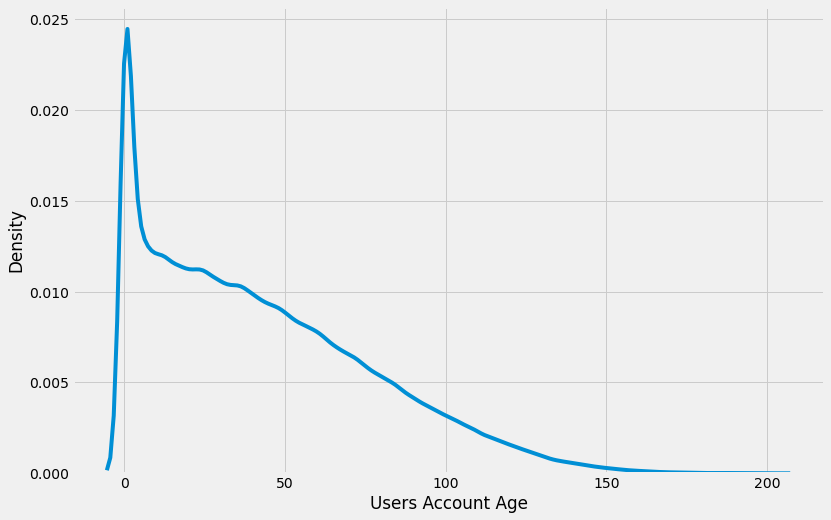

In [11]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x="u_month_age", data=df)
plt.xlabel("Users Account Age")
plt.show()

## Distribution of Business Stars 

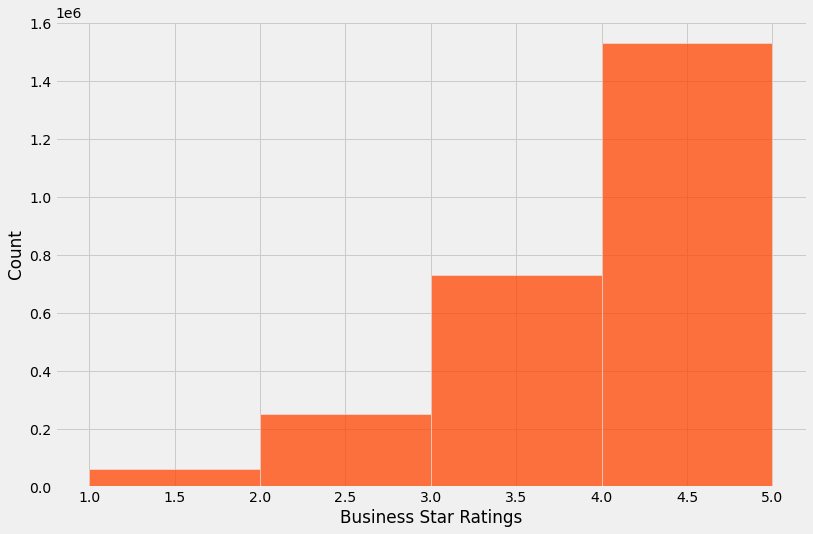

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="b_stars", bins=4, color="orangered")
plt.xlabel("Business Star Ratings")
plt.show()

## Business Review Count

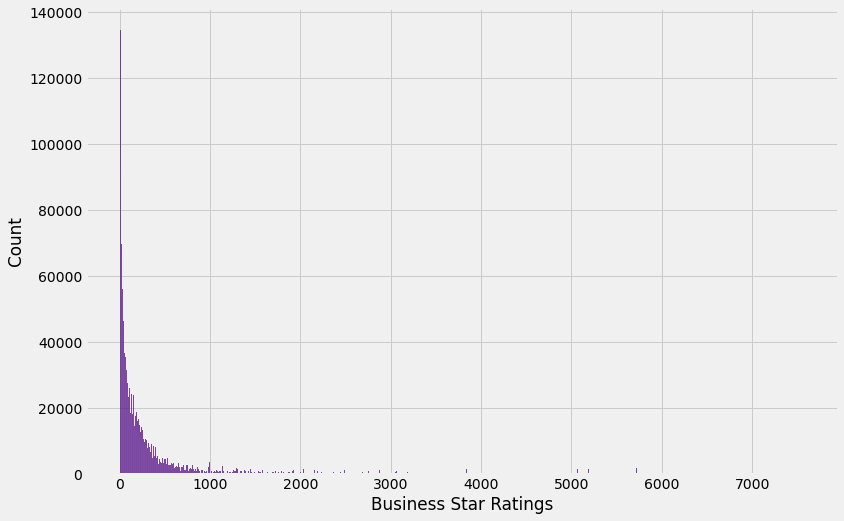

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="b_review_count", color="indigo")
plt.xlabel("Business Star Ratings")
plt.show()

## Distribution of Review Sentiment

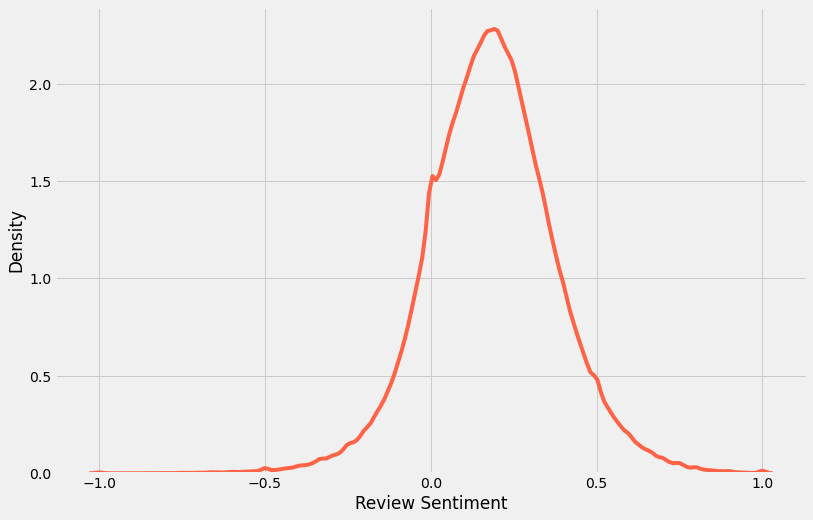

In [14]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x="r_sen", data=df, color="tomato")
plt.xlabel("Review Sentiment")
plt.show()

## Distribution of Review Subjectivity

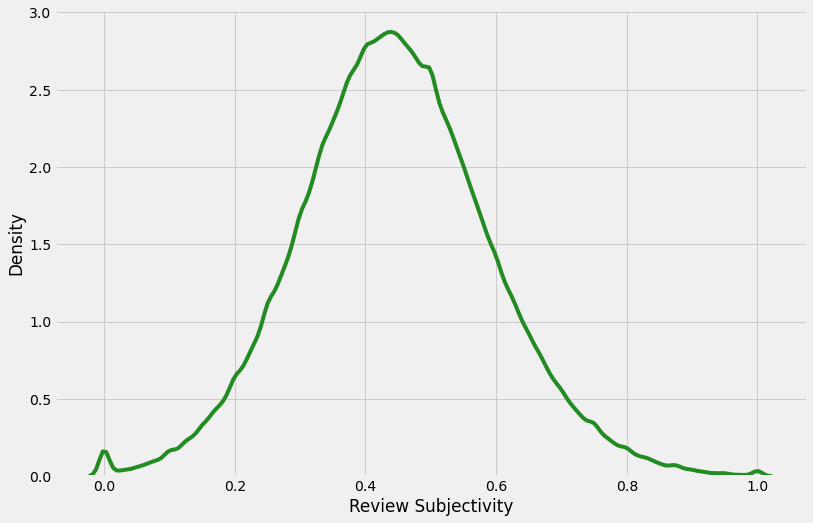

In [15]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x="r_sub", data=df, color="forestgreen")
plt.xlabel("Review Subjectivity")
plt.show()

## Distribution of Review Readability

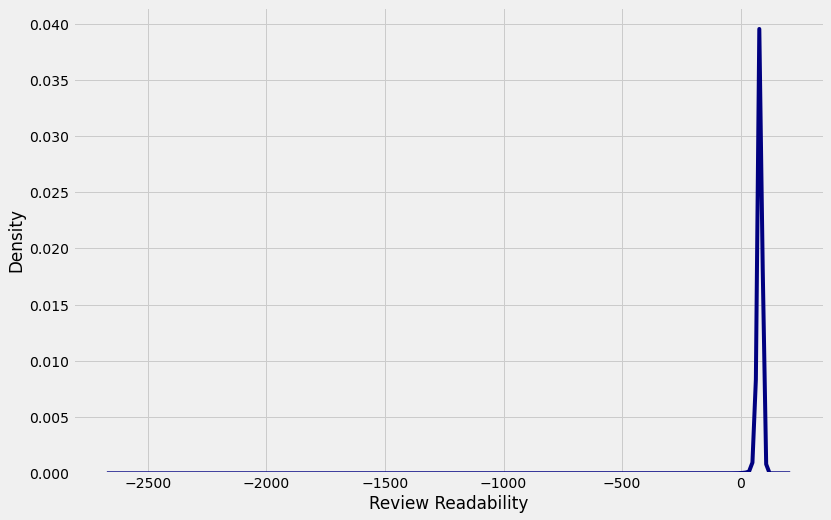

In [16]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x="r_rea", data=df, color="navy")
plt.xlabel("Review Readability")
plt.show()

## Distribution of Review Usefulness

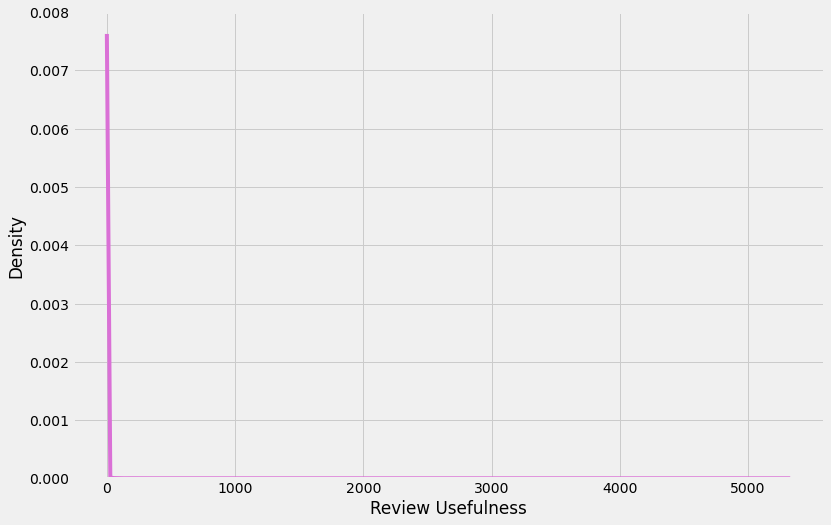

In [17]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x="r_useful", data=df, color="orchid")
plt.xlabel("Review Usefulness")
plt.show()

# Data Standarization

## Splitting the data randomly

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) # 80-20 split 
# df_val, df_test = train_test_split(df_test, test_size=0.1, random_state=42) # 10-10 split of 20

In [20]:
print(f"<======== Info about Training Data ============>")
print(f"Number of records in training data : {df_train.shape[0]}")
print(f"Number of attributes in training data : {df_train.shape[1]}")

# print(f"<======== Info about Validation Data ============>")
# print(f"Number of records in training data : {df_val.shape[0]}")
# print(f"Number of attributes in training data : {df_val.shape[1]}")

print(f"<======== Info about Test Data ============>")
print(f"Number of records in training data : {df_test.shape[0]}")
print(f"Number of attributes in training data : {df_test.shape[1]}")

<======== Info about Training Data ============>
Number of records in training data : 2060626
Number of attributes in training data : 13
<======== Info about Test Data ============>
Number of records in training data : 51516
Number of attributes in training data : 13


In [21]:
df_train.to_parquet(f"{root}/data/train.parquet", index=False, compression="snappy")
df_test.to_parquet(f"{root}/data/test.parquet", index=False, compression="snappy")

## Standarizing the Data

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [22]:
ct = ColumnTransformer([
    ("standarize_feat", StandardScaler(), df_train.drop(['r_useful', 'r_id'], axis=1).columns.tolist())
], remainder='passthrough')

In [23]:
cols = df_train.drop(['r_useful', 'r_id'], axis=1).columns.tolist() + ['r_id', 'r_useful']

df_train_transformed = pd.DataFrame(ct.fit_transform(df_train), columns=cols)
df_val_transformed = pd.DataFrame(ct.transform(df_val), columns=cols)
df_test_transformed = pd.DataFrame(ct.transform(df_test), columns=cols)

In [24]:
df_train_transformed['r_id'] = df_train_transformed['r_id'].apply(int)
df_val_transformed['r_id'] = df_val_transformed['r_id'].apply(int)
df_test_transformed['r_id'] = df_test_transformed['r_id'].apply(int)

In [25]:
df_train_transformed.head()

,r_stars,r_stars_square,r_length,u_friends_count,u_review_count,u_month_age,b_stars,b_review_count,r_sen,r_sub,r_rea,r_id,r_useful
0,-1.693936,-1.494513,0.961938,-0.331709,-0.323091,-0.609501,-0.934654,-0.238997,-1.403165,1.124223,-0.796690,4847617,0.118048
1,-0.394383,-0.662991,-0.836997,0.248959,0.116364,-0.277802,0.953066,-0.475961,-1.152980,0.742918,1.431968,5577152,0.011136
2,-0.394383,-0.662991,-0.515448,-0.271701,-0.258584,0.664981,-0.305414,-0.309486,0.345055,0.438695,1.339823,1113002,0.030032
3,-1.693936,-1.494513,1.970036,-0.250521,-0.371472,-1.232336,-1.563893,-0.354480,-2.135030,-0.014948,-0.677443,6353340,0.017990
4,0.255394,0.064590,0.118959,-0.331709,-0.379535,-1.027147,-0.934654,-0.080021,0.011747,0.312105,-0.634984,5836201,0.006991


In [26]:
df_train.head()

,r_id,r_stars,r_stars_square,r_length,u_friends_count,u_review_count,u_month_age,b_stars,b_review_count,r_sen,r_sub,r_rea,r_useful
index,,,,,,,,,,,,,
1788410,4847617,1,1,244,1,31,21.685489,3.0,178,-0.088095,0.609524,71.21,0.118048
2057126,5577152,3,9,37,330,249,33.145428,4.5,20,-0.039881,0.553571,95.88,0.011136
389263,1113002,3,9,74,35,63,65.717893,3.5,131,0.248810,0.508929,94.86,0.030032
2338641,6353340,1,1,360,47,7,0.166990,2.5,101,-0.229135,0.442361,72.53,0.017990
2136962,5836201,4,16,147,1,3,7.256111,3.0,284,0.184577,0.490353,73.00,0.006991


In [27]:
df_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
r_stars,2060626.0,-1.671941e-16,1.000000e+00,-1.693936,-1.044159e+00,2.553940e-01,9.051706e-01,9.051706e-01
r_stars_square,2060626.0,-1.018940e-17,1.000000e+00,-1.494513,-1.182692e+00,6.458972e-02,1.000051e+00,1.000051e+00
r_length,2060626.0,-2.388216e-17,1.000000e+00,-1.158545,-6.631864e-01,-2.808043e-01,3.275309e-01,8.122912e+00
u_friends_count,2060626.0,-1.731163e-17,1.000000e+00,-0.331709,-3.299440e-01,-2.628759e-01,-3.696244e-02,2.613194e+01
u_review_count,2060626.0,3.255780e-17,1.000000e+00,-0.385583,-3.634084e-01,-2.968854e-01,-3.079341e-02,3.483733e+01
u_month_age,2060626.0,3.771456e-16,1.000000e+00,-1.237169,-8.424000e-01,-1.823749e-01,6.486289e-01,4.604853e+00
b_stars,2060626.0,-8.181173e-17,1.000000e+00,-3.451613,-3.054136e-01,3.238264e-01,9.530663e-01,1.582306e+00
b_review_count,2060626.0,2.582693e-17,1.000000e+00,-0.498458,-4.459658e-01,-3.184850e-01,6.965998e-03,1.084433e+01
r_sen,2060626.0,5.128801e-16,1.000000e+00,-6.135095,-6.346910e-01,-7.891442e-03,6.128473e-01,4.243026e+00
r_sub,2060626.0,-4.767259e-16,1.000000e+00,-3.029519,-6.557234e-01,-2.057011e-02,6.333986e-01,3.785211e+00


In [28]:
df_val_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
r_stars,463641.0,1.302849e-03,9.986379e-01,-1.693936,-1.044159e+00,2.553940e-01,9.051706e-01,9.051706e-01
r_stars_square,463641.0,8.331443e-04,9.990671e-01,-1.494513,-1.182692e+00,6.458972e-02,1.000051e+00,1.000051e+00
r_length,463641.0,-1.579826e-03,9.954107e-01,-1.149855,-6.631864e-01,-2.894948e-01,3.275309e-01,7.905650e+00
u_friends_count,463641.0,-1.708824e-04,1.004683e+00,-0.331709,-3.299440e-01,-2.628759e-01,-3.872739e-02,2.613194e+01
u_review_count,463641.0,-8.216426e-04,1.015638e+00,-0.385583,-3.634084e-01,-2.968854e-01,-3.079341e-02,3.483733e+01
u_month_age,463641.0,1.640416e-04,9.998493e-01,-1.237169,-8.424691e-01,-1.815714e-01,6.476120e-01,4.562570e+00
b_stars,463641.0,1.073559e-03,1.000117e+00,-3.451613,-3.054136e-01,3.238264e-01,9.530663e-01,1.582306e+00
b_review_count,463641.0,-5.150275e-03,9.883892e-01,-0.498458,-4.459658e-01,-3.184850e-01,3.966450e-03,1.084433e+01
r_sen,463641.0,9.195308e-04,9.989454e-01,-6.135095,-6.325272e-01,-8.111978e-03,6.119185e-01,4.243026e+00
r_sub,463641.0,4.806703e-04,1.000058e+00,-3.029519,-6.554576e-01,-1.967738e-02,6.333986e-01,3.785211e+00


In [29]:
df_test_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
r_stars,51516.0,7.546578e-03,9.975215e-01,-1.693936,-1.044159e+00,2.553940e-01,9.051706e-01,9.051706e-01
r_stars_square,51516.0,7.498905e-03,9.985435e-01,-1.494513,-1.182692e+00,6.458972e-02,1.000051e+00,1.000051e+00
r_length,51516.0,1.373907e-03,1.004459e+00,-1.115093,-6.631864e-01,-2.894948e-01,3.275309e-01,7.957793e+00
u_friends_count,51516.0,7.383436e-03,1.014115e+00,-0.331709,-3.299440e-01,-2.611110e-01,-3.166759e-02,1.912686e+01
u_review_count,51516.0,7.832444e-03,1.002105e+00,-0.383567,-3.634084e-01,-2.968854e-01,-2.273002e-02,3.483733e+01
u_month_age,51516.0,8.651014e-03,1.005518e+00,-1.237169,-8.385664e-01,-1.723041e-01,6.600945e-01,4.518000e+00
b_stars,51516.0,4.735913e-03,9.987820e-01,-3.451613,-3.054136e-01,3.238264e-01,9.530663e-01,1.582306e+00
b_review_count,51516.0,7.297825e-03,1.021523e+00,-0.498458,-4.459658e-01,-3.154855e-01,1.296509e-02,1.084433e+01
r_sen,51516.0,1.309820e-03,9.976333e-01,-6.135095,-6.299430e-01,-4.700170e-03,6.199511e-01,4.243026e+00
r_sub,51516.0,7.357318e-03,1.007187e+00,-3.029519,-6.510723e-01,-1.460722e-02,6.390753e-01,3.785211e+00


## Save Data

In [30]:
if not os.path.exists(f"{root}/data/"):
    os.mkdir(f"{root}/data/")
    
    
# Transformed Data
df_train_transformed.to_parquet(f"{root}/data/train_transformed.parquet", index=False, compression="snappy")
df_val_transformed.to_parquet(f"{root}/data/val_transformed.parquet", index=False, compression="snappy")
df_test_transformed.to_parquet(f"{root}/data/test_transformed.parquet", index=False, compression="snappy")


# Original Data
df_train.to_parquet(f"{root}/data/train.parquet", index=False, compression="snappy")
df_val.to_parquet(f"{root}/data/val.parquet", index=False, compression="snappy")
df_test.to_parquet(f"{root}/data/test.parquet", index=False, compression="snappy")